<h3>Estrategia de backtesting Vectorizada </h3>
Igual como se hizo en 3.0.4-get_data.ipynb se van a calcular los retornos diarios y a partir de ahí establecer la estrategia de backtesting vectorizada

In [1]:
# se realizan todas las importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A continuación se va a establecer el estilo de gráficación (seaborn), es necesario notar que en el curso usan el comando <code>plt.style.use("seaborn")</code> que aparentemente está obsoleto por lo que el comando correcto es el de la siguienter celda.

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [24]:
"""
Se importan los datos de EUR/USD desde un archivo csv. El archivo debe residir en la misma
carpeta qwue el script
"""
data = pd.read_csv("Scripts/eurusd.csv", parse_dates=["Date"], index_col = "Date")

In [25]:
"""Como siempre se calculan las medias móviles corta (50)
y larga (200) para el precio de cierre"""
data["SMA_S"] = data.price.rolling(50).mean()
data["SMA_L"] = data.price.rolling(200).mean()

In [26]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


In [28]:
data.dropna(inplace=True)

In [29]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


In [30]:
"""También se calcula una columna position que corresponde
a la estrategia buy/hold"""
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)

In [31]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


Ahora se calculan los retornos diarios

In [32]:
data["retornos"] = np.log(data.price.div(data.price.shift(1)))
data

,price,SMA_S,SMA_L,position,retornos
Date,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102
...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562


A continuación se va a crear la columna estrategia cuyo valor se obtiene multiplicando el valor de la columna "position" del día anterior por el valor del día actual de la columna "retornos"

In [34]:
data["estrategia"] = data.position.shift(1) * data["retornos"]

In [35]:
data

,price,SMA_S,SMA_L,position,retornos,estrategia
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [36]:
data.dropna(inplace=True)

In [37]:
data[["retornos", "estrategia"]].sum() #realización absoluta

retornos     -0.087929
estrategia    0.249591
dtype: float64

In [38]:
data[["retornos", "estrategia"]].sum().apply(np.exp)

retornos      0.915826
estrategia    1.283500
dtype: float64

In [39]:
data[["retornos", "estrategia"]].mean() * 252 # realización anualizada

retornos     -0.005438
estrategia    0.015435
dtype: float64

In [40]:
data[["retornos", "estrategia"]].std() * np.sqrt(252) # riesgo anualizado

retornos      0.120806
estrategia    0.120802
dtype: float64

In [41]:
data["cretornos"] = data["retornos"].cumsum().apply(np.exp)
data["cestrategia"] = data["estrategia"].cumsum().apply(np.exp)

In [42]:
data

,price,SMA_S,SMA_L,position,retornos,estrategia,cretornos,cestrategia
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


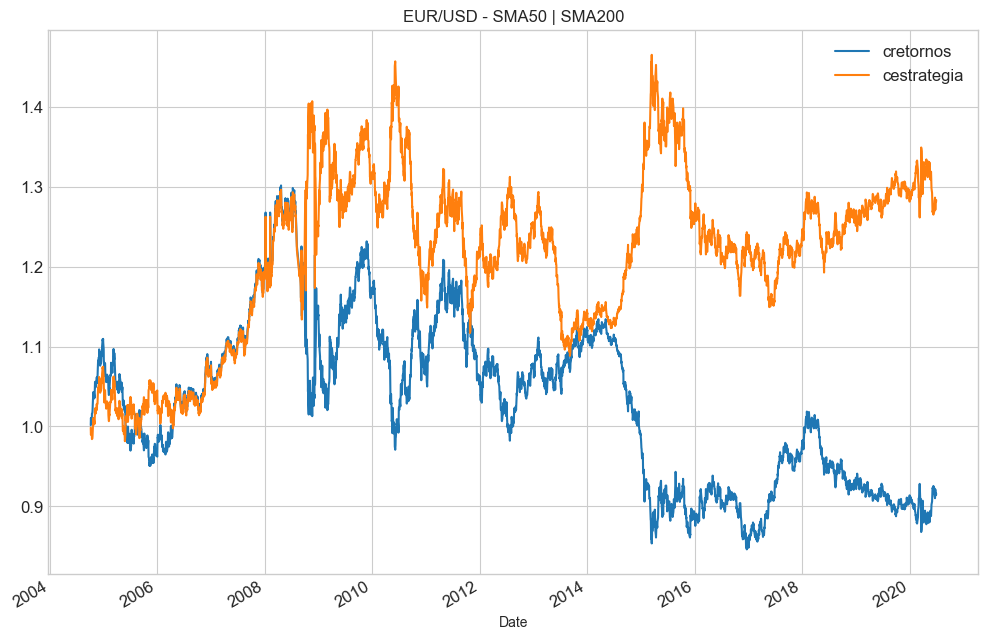

In [43]:
data[["cretornos", "cestrategia"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(50, 200), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [21]:
outperf = data.cestrategia.iloc[-1] - data.cretornos.iloc[-1]
outperf

np.float64(0.3676743925451291)